# VAE

In [1]:
import sys
import os
import seaborn as sns
sys.path.append( '..' )

from VAE.smac_runhistories import *
from VAE.vae import *

## Parameter definition

In [2]:
data_dir  = os.path.normpath(os.path.join(os.getcwd(), "/mnt/d/runs/FIA/Com8_grown_together/oms"))
run_dir = os.path.normpath(os.path.join(os.getcwd(), "/mnt/d/runs/VAE/hyperparameter_optimization"))
results_dir = os.path.normpath(os.path.join(os.getcwd(), "/mnt/d/runs/VAE/results"))
verbosity = 1
backend_name = "tensorflow"
computation = "gpu"
outdir = Path(os.path.normpath(os.path.join(run_dir, f"smac_vae_{backend_name}_{computation}")))

time_step(message="Setup loaded", verbosity=verbosity)

X = read_data(data_dir, verbosity=verbosity)

Setup loaded (0.009573221206665039s)
Data loaded (7.618575572967529s)


## Training

In [3]:
# On cluster


In [4]:
backend_name = "tensorflow"
computation = "cpu"
name = "tied_fin"
project = f"vae_{backend_name}_{computation}_{name}"
outdir = Path(os.path.normpath( os.path.join("/mnt/d/runs/VAE/training", project)))

In [6]:
model = keras.saving.load_model(os.path.join(outdir, f"{project}_best.keras"), custom_objects=None, compile=True, safe_mode=True)

In [7]:
model.summary()

Model: "fia_vae_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ ?                      │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_intermediate            │ ?                      │   619,125,435 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_mu (Dense)               │ ?                      │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_sigma (Dense)            │ ?                      │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_reparametrization        │ ?                      │             0 │
│ (Sampling)                      │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Sequential)            │ ?                      │   619,951,886 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,859,858,181 (6.93 GB)

 Trainable params: 619,952,726 (2.31 GB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,239,905,455 (4.62 GB)

## Reconstruction

In [8]:
reconstructed_data = pd.DataFrame( model(X).numpy() )

### Show model

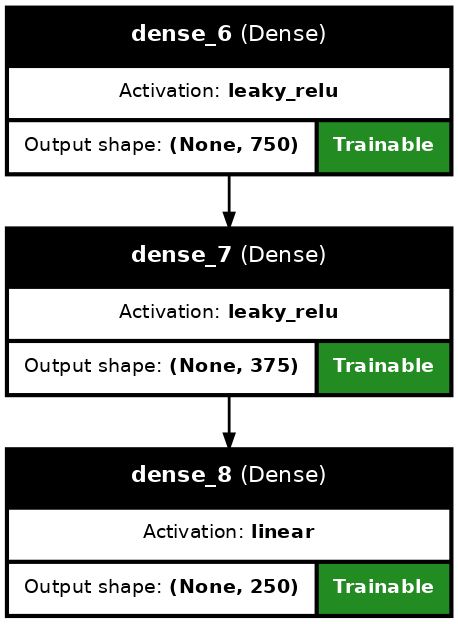

In [74]:
model_plot = keras.utils.plot_model( model.get_layer(index=2), show_shapes=True, show_dtype=False, show_layer_names=True,
                                     rankdir="TB", expand_nested=True, dpi=100, to_file="../../reports/model.png",
                                     show_layer_activations=True, show_trainable=True )
model_plot

## Plot training

In [9]:
history = pd.read_csv(os.path.join(outdir, f"{project}.history.tsv"), sep="\t", index_col="Unnamed: 0")
history

,kl_loss,loss,reconstruction_loss,val_kl_loss,val_loss,val_reconstruction_loss
0,4.625320e-05,0.000232,0.000178,0.000003,0.000142,0.000139
1,1.748403e-06,0.000110,0.000108,0.000000,0.000080,0.000080
2,4.768372e-07,0.000074,0.000074,0.000000,0.000045,0.000045
3,1.112620e-06,0.000047,0.000046,0.000000,0.000041,0.000041
4,1.341105e-06,0.000034,0.000033,0.000000,0.000012,0.000012
...,...,...,...,...,...,...
95,0.000000e+00,0.000001,0.000001,0.000000,0.000001,0.000001
96,0.000000e+00,0.000001,0.000001,0.000000,0.000001,0.000001
97,0.000000e+00,0.000001,0.000001,0.000000,0.000001,0.000001
98,0.000000e+00,0.000001,0.000001,0.000000,0.000002,0.000002


In [10]:
training_losses = history[[col for col in history.columns if not col.startswith("val")]]
validation_losses = history[[col for col in history.columns if col.startswith("val")]]

## Plot results

In [11]:
# reconstructed_data = pd.read_csv("/mnt/d/runs/VAE/training/vae_tensorflow_cpu_hm_1/vae_tensorflow_cpu_hm_1.prediction.tsv", index_col="Unnamed: 0")#, sep="\t")

In [1]:
plot_df = pd.DataFrame(reconstructed_data.loc[1].values , index=X.columns, columns=["inty"]).reset_index()
plot_df_2 = pd.DataFrame(X.iloc[1].values, index=X.columns, columns=["inty"]).reset_index()

NameError: name 'pd' is not defined

In [13]:
mae = np.mean( np.abs((plot_df_2["inty"] - plot_df["inty"])) )
ae = np.sum( np.abs((plot_df_2["inty"] - plot_df["inty"])) )

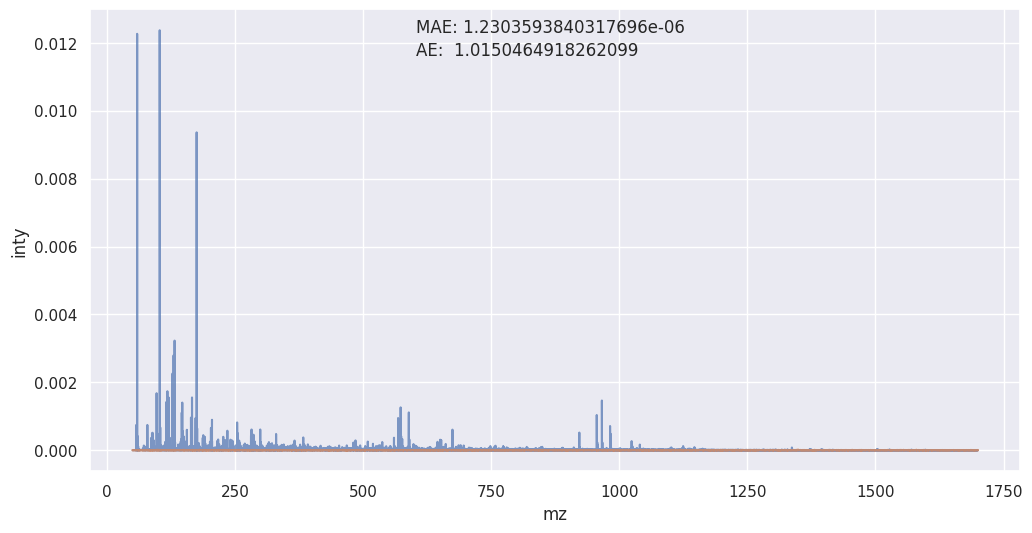

In [14]:
sns.set_theme(rc={"figure.figsize":(12, 6)})
ax = sns.lineplot(data=plot_df_2, x="mz", y="inty", alpha=0.7)
ax = sns.lineplot(data=plot_df, x="mz", y="inty", alpha=0.7)
plt.annotate(f"MAE: {mae}", xy=(0.35, 0.95), xycoords='axes fraction')
plt.annotate(f"AE:  {ae}", xy=(0.35, 0.90), xycoords='axes fraction')
plt.show()

(965.9, 966.1)

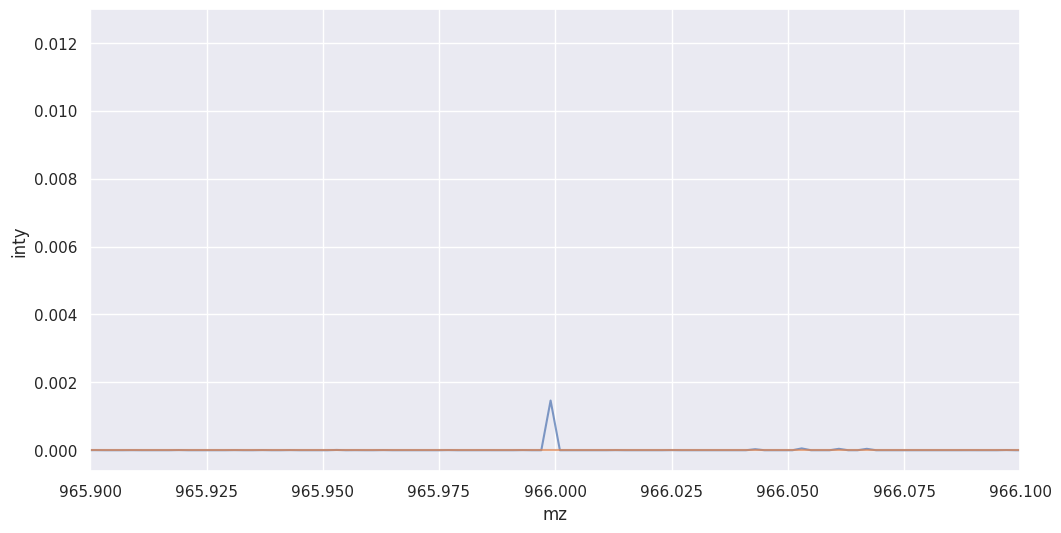

In [15]:
sns.set_theme(rc={"figure.figsize":(12, 6)})
ax = sns.lineplot(data=plot_df_2, x="mz", y="inty" ,alpha=0.7)
ax = sns.lineplot(data=plot_df, x="mz", y="inty", alpha=0.7)
ax.set_xlim(965.9, 966.1)

(-0.0001, 0.003)

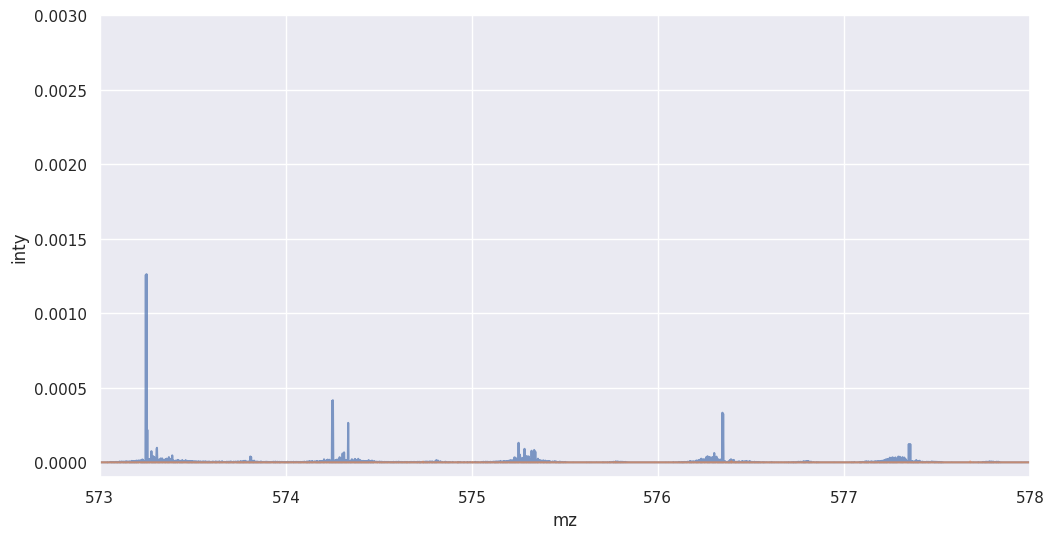

In [16]:
sns.set_theme(rc={"figure.figsize":(12, 6)})
ax = sns.lineplot(data=plot_df_2, x="mz", y="inty" ,alpha=0.7)
ax = sns.lineplot(data=plot_df, x="mz", y="inty", alpha=0.7)
ax.set_xlim(573, 578)
ax.set_ylim(-0.0001, 0.003)

(-0.0001, 0.0022)

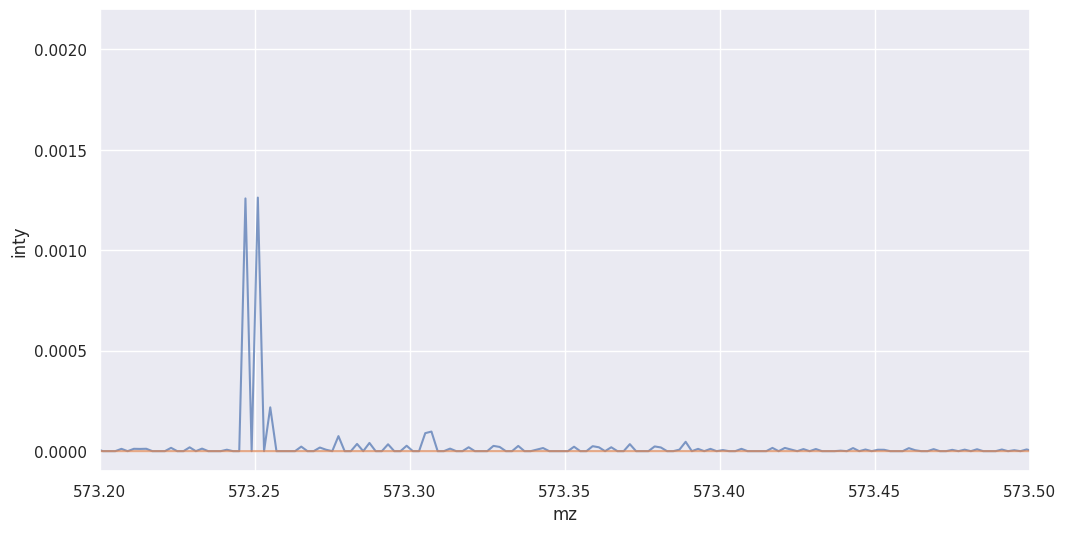

In [17]:
sns.set_theme(rc={"figure.figsize":(12, 6)})
ax = sns.lineplot(data=plot_df_2, x="mz", y="inty" ,alpha=0.7)
ax = sns.lineplot(data=plot_df, x="mz", y="inty", alpha=0.7)
ax.set_xlim(573.2, 573.5)
ax.set_ylim(-0.0001, 0.0022)

## Classification

In [18]:
vae_enc = pd.DataFrame( model.encode_mu(X) )
vae_enc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.000020,0.000012,-0.000034,-0.000004,1.157212e-06,0.000018,0.000011,-0.000025,0.000002,0.000015,-0.000008,0.000011,0.000034,-0.000019,-0.000019,0.000009,0.000013,-2.929461e-06,-0.000005,0.000020
1,-0.000018,0.000010,-0.000035,-0.000007,2.674751e-07,0.000017,0.000010,-0.000024,0.000002,0.000018,-0.000009,0.000008,0.000033,-0.000021,-0.000019,0.000006,0.000014,-2.180648e-06,-0.000006,0.000021
2,-0.000013,0.000004,-0.000038,-0.000009,-2.772241e-06,0.000017,0.000008,-0.000024,0.000003,0.000019,-0.000008,0.000009,0.000031,-0.000024,-0.000020,0.000005,0.000014,7.285380e-07,-0.000005,0.000022
3,-0.000015,0.000008,-0.000036,-0.000008,-2.162418e-06,0.000017,0.000010,-0.000023,0.000004,0.000017,-0.000008,0.000010,0.000033,-0.000021,-0.000019,0.000007,0.000014,-1.489883e-06,-0.000005,0.000020
4,-0.000016,0.000009,-0.000036,-0.000007,-1.043412e-06,0.000017,0.000009,-0.000024,0.000004,0.000017,-0.000008,0.000009,0.000033,-0.000022,-0.000019,0.000007,0.000014,-1.517074e-07,-0.000005,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-0.000015,0.000008,-0.000036,-0.000008,-1.103785e-06,0.000016,0.000010,-0.000023,0.000004,0.000017,-0.000009,0.000008,0.000033,-0.000021,-0.000019,0.000008,0.000014,-6.732480e-07,-0.000004,0.000020
64,-0.000015,0.000007,-0.000036,-0.000008,-1.658048e-06,0.000017,0.000009,-0.000023,0.000003,0.000017,-0.000009,0.000010,0.000031,-0.000023,-0.000019,0.000006,0.000014,-9.345204e-07,-0.000005,0.000020
65,-0.000016,0.000008,-0.000036,-0.000008,-6.890896e-07,0.000017,0.000010,-0.000023,0.000004,0.000017,-0.000008,0.000009,0.000032,-0.000021,-0.000018,0.000008,0.000013,-1.592198e-07,-0.000005,0.000021
66,-0.000021,0.000013,-0.000036,-0.000004,1.016506e-07,0.000020,0.000011,-0.000026,0.000002,0.000017,-0.000005,0.000014,0.000036,-0.000021,-0.000019,0.000010,0.000013,-3.239664e-06,-0.000008,0.000021


In [19]:
vae_enc.to_csv( os.path.join("/mnt/d/runs/VAE/results", "encoded_mu_tied_mae.tsv"), sep="\t" )